CS746 Fall 2024 Big HW3 Feature Selection and PCA

Using the SAT dataset ('CASE1201.ASC.txt')

Create a .ipynb notebook to submit your assignment. The file name should start with “BHW3_yourwsuid”. 

1.	Display the correlation and covariance tables for the raw features.

2.	Build a: (a)  simple (intercept + takers) and (b) full linear regression model to predict the SAT scores. (that is, simply copy the first two models from the SAT_example.ipynb presented in class.)

3.	Choose at least one method from each of the three feature selection techniques (filter, wrapper, and embedded). Select and report the “best” features using these three methods.

4.	Did you expect to see any differences between the “best features” in the different models you chose? Do you see any significant differences? (answer this using a markdown cell in the .ipynb file).

5.	Calculate the Principal Components for the same data set: (a) Normalize the data, (b) display correlation and covariance tables fort the normalized data, build the PCA following the in-class model, and finally display the explained variance for all the principal components.

6.	In your opinion, what is the “best” number of Principal Components to use? (again, answer using a markdown cell).


In [78]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [79]:
df = pd.read_csv("CASE1201.ASC.txt", sep=' ', skipinitialspace=True)

df.head(5)

,state,sat,takers,income,years,public,expend,rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   50 non-null     object 
 1   sat     50 non-null     int64  
 2   takers  50 non-null     int64  
 3   income  50 non-null     int64  
 4   years   50 non-null     float64
 5   public  50 non-null     float64
 6   expend  50 non-null     float64
 7   rank    50 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.3+ KB


**Question: 1.** Display the correlation and covariance tables for the raw features.

In [81]:
df.corr(method='pearson',numeric_only=True)

,sat,takers,income,years,public,expend,rank
sat,1.000000,-0.857810,0.584467,0.330969,-0.080357,-0.062878,0.879909
takers,-0.857810,1.000000,-0.661935,-0.101544,0.123556,0.283630,-0.942833
income,0.584467,-0.661935,1.000000,0.134762,-0.306567,0.131519,0.532700
years,0.330969,-0.101544,0.134762,1.000000,-0.417118,0.059829,0.070224
public,-0.080357,0.123556,-0.306567,-0.417118,1.000000,0.284591,0.050624
expend,-0.062878,0.283630,0.131519,0.059829,0.284591,1.000000,-0.264969
rank,0.879909,-0.942833,0.532700,0.070224,0.050624,-0.264969,1.000000


In [82]:
df.cov(numeric_only=True)

,sat,takers,income,years,public,expend,rank
sat,5020.628980,-1338.557959,1809.468163,16.415461,-55.975265,-27.377412,406.695184
takers,-1338.557959,484.991429,-636.934286,-1.565331,26.750122,38.382824,-135.442204
income,1809.468163,-636.934286,1909.081224,4.121616,-131.683592,35.311747,151.826286
years,16.415461,-1.565331,4.121616,0.489975,-2.870384,0.257343,0.320643
public,-55.975265,26.750122,-131.683592,-2.870384,96.646922,17.192242,3.246376
expend,-27.377412,38.382824,35.311747,0.257343,17.192242,37.760192,-10.620972
rank,406.695184,-135.442204,151.826286,0.320643,3.246376,-10.620972,42.550465


<Axes: >

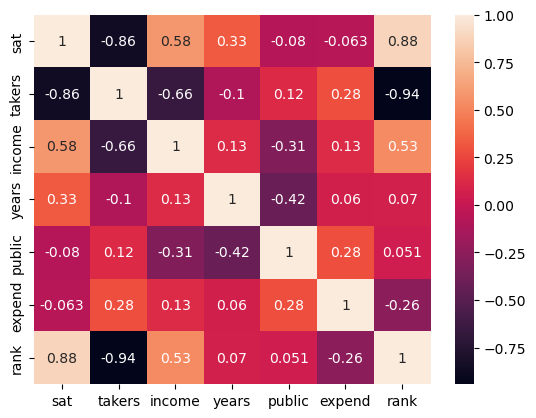

In [83]:
import seaborn as sns

sns.heatmap(df.corr(method='pearson',numeric_only=True), annot=True )


**Question: 2.**	Build a: (a)  simple (intercept + takers) and (b) full linear regression model to predict the SAT scores. (that is, simply copy the first two models from the SAT_example.ipynb presented in class.)

Build **Simple Linear Regression** using **takers** variable

In [84]:
import statsmodels.api as sm

X = df[['takers']]
y= df['sat']

X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()
model.summary(xname=['intercept','takers'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.77e-15
Time:                        12:33:58   Log-Likelihood:                -250.19
No. Observations:                  50   AIC:                             504.4
Df Residuals:                      48   BIC:                             508.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1020.3062      8.139    125.359      0.000    1003.941    1036.671
takers        -2.7600      0.239    -11.563      0.000      -3.240      -2.280
==============================================================================
Omnibus:                        0.370   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.144
Skew:                          -0.131   Prob(JB):                        0.931
Kurtosis:                       3.011   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Build **Full Linear Regression** using all variable

In [85]:
X_full=df[['takers', 'income', 'years', 'public', 'expend','rank']]
X_full_with_constant = sm.add_constant(df[['takers', 'income', 'years', 'public', 'expend','rank']])

model_full = sm.OLS(y,X_full_with_constant).fit()
model_full.summary(xname=['intercept','takers', 'income', 'years', 'public','expend','rank'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     51.91
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.16e-18
Time:                        12:33:58   Log-Likelihood:                -230.74
No. Observations:                  50   AIC:                             475.5
Df Residuals:                      43   BIC:                             488.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -94.6591    211.510     -0.448      0.657    -521.209     331.891
takers        -0.4801      0.694     -0.692      0.493      -1.879       0.919
income        -0.0082      0.152     -0.054      0.957      -0.315       0.299
years         22.6101      6.315      3.581      0.001       9.876      35.345
public        -0.4642      0.579     -0.802      0.427      -1.632       0.704
expend         2.2120      0.846      2.615      0.012       0.506       3.918
rank           8.4762      2.108      4.021      0.000       4.225      12.727
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.957
Skew:                          -0.591   Prob(JB):                        0.228
Kurtosis:                       3.152   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Summary** Full regression model performs better compared to simple linear regression. As full model successfully capture the variability of features and loss of information is zero when all the features are selected. But when only one feature is taken than the information that other features carries got lost. So, full regression model better perform here.

**Question:3.**	Choose at least one method from each of the three feature selection techniques (filter, wrapper, and embedded). Select and report the “best” features using these three methods.

From **Filter** technique **Information Gain** selection method is used.

In [86]:
from sklearn.feature_selection import mutual_info_regression

# First calculating the mutual information scores for regression using mutual_info_regression
informationGain_scores = mutual_info_regression(X_full, y)

# Create a DataFrame to display feature importance based on information gain
informationGain_scores_df = pd.DataFrame({'Feature': X_full.columns, 'Information Gain': informationGain_scores})

# Sort features by importance (descending)
informationGain_scores_df = informationGain_scores_df.sort_values(by='Information Gain', ascending=False)

# select top 3 features from the informationGain_scores_df
selected_feature_df= informationGain_scores_df.nlargest(3, 'Information Gain').sort_index(axis=0)

# Print selected features
print("Selected important features based on Information Gain for Regression:")
print(selected_feature_df)

Selected important features based on Information Gain for Regression:
  Feature  Information Gain
0  takers          0.697953
1  income          0.307157
5    rank          0.774553


**Summary:** From above information gain selection process using mutual_info_regression, it has selected top three features based on the information gain which are **'takers', 'income', 'rank'**


From **Wrapper** technique **Exhaustive Feature** selection method is used.

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LinearRegression

# First initialize the linear regression model
model = LinearRegression()

# Using exhaustive feature selector and providing parameters. 
# here, min_feature and man_feature are the no of features that exhaustive feature selector 
# works on to get the best match
efs = ExhaustiveFeatureSelector(
    model,
    min_features=1,
    max_features=3, 
    scoring='r2',  
    cv=5  
)

# Mow fitting the selector to the training data
efs = efs.fit(X_full, y)

# Now get the selected features
selected_features = list(efs.best_feature_names_)

# Print selected features
print("Selected important features based on Exhaustive Feature Selection:")
print(selected_features)

Features: 41/41

Selected important features based on Exhaustive Feature Selection:
['years', 'expend', 'rank']


**Summary:** From above exhustive feature selection process using ExhustiveFeatireSelector, it has selected top three features which are **'takers', 'expend', 'rank'**


From **Embedded** technique using **Elastic Net** selection method is used.

In [88]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [ ]:
# First initialize alpha and l1_ratio values and initilize elasticnet
alpha = 0.1  # Regularization strength
l1_ratio = 0.5  # Balance between L1 and L2 regularization
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elastic_net.fit(X_full, y)

# Now extract feature importances (coefficients) and put it in dataframe
feature_importance = pd.DataFrame({
    'Feature': X_full.columns,
    'Coefficient': elastic_net.coef_
})

# Filter to keep only features with absolute value greater than 1
important_features = feature_importance[feature_importance['Coefficient'].abs() > 1].sort_index(axis=0)

# Print selected important features
print("Selected important features based on ElasticNet:")
print(important_features)

Selected important features based on ElasticNet:
  Feature  Coefficient
2   years    19.738259
4  expend     2.320676
5    rank     8.496354


**Summary:** From above embaded feature selection process using Elasticnet, it has selected top three features which are **'takers', 'expend', 'rank'**. The feature selection using Exhustive selection and Elastic net is same as both the methods found same features.

**Now Performing Model building using the selective features.**

Using features from **Filter Selection Technique using Information Gain method**
['takers', 'income', 'rank']

In [126]:
X_info_gain = df[['takers', 'income', 'rank']]
y=y
X_info_gain_with_constant = sm.add_constant(X_info_gain)

model_info_gain = sm.OLS(y, X_info_gain_with_constant).fit()
model_info_gain.summary(xname=['constant','takers','income','rank'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     58.75
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           9.09e-16
Time:                        12:59:26   Log-Likelihood:                -244.10
No. Observations:                  50   AIC:                             496.2
Df Residuals:                      46   BIC:                             503.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     209.9814    228.987      0.917      0.364    -250.945     670.907
takers        -0.1022      0.786     -0.130      0.897      -1.684       1.479
income         0.2506      0.156      1.607      0.115      -0.063       0.564
rank           8.3385      2.349      3.549      0.001       3.610      13.067
==============================================================================
Omnibus:                        3.294   Durbin-Watson:                   0.939
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                3.114
Skew:                          -0.593   Prob(JB):                        0.211
Kurtosis:                       2.700   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using **Wrapper technique with exhustive method**
['years', 'expend', 'rank']

In [124]:
X_exhustive_feature = df[['years', 'expend', 'rank']]
y=y
X_exhustive_feature_with_constant = sm.add_constant(X_exhustive_feature)

model_exhustive_feature = sm.OLS(y, X_exhustive_feature_with_constant).fit()
model_exhustive_feature.summary(xname=['constant','years','expend','rank'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.76e-20
Time:                        12:52:24   Log-Likelihood:                -232.25
No. Observations:                  50   AIC:                             472.5
Df Residuals:                      46   BIC:                             480.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    -303.7243     97.842     -3.104      0.003    -500.669    -106.779
years         26.0952      5.389      4.842      0.000      15.247      36.944
expend         1.8609      0.635      2.930      0.005       0.582       3.139
rank           9.8258      0.599     16.412      0.000       8.621      11.031
==============================================================================
Omnibus:                        5.236   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                4.172
Skew:                          -0.667   Prob(JB):                        0.124
Kurtosis:                       3.473   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using **Embedded technique with ElasticNet method**
['years', 'expend', 'rank']

In [125]:
X_elastic_net_feature = df[['years', 'expend', 'rank']]
y=y
X_elastic_net_with_constant = sm.add_constant(X_elastic_net_feature)

model_elastic_net_feature = sm.OLS(y, X_elastic_net_with_constant).fit()
model_elastic_net_feature.summary(xname=['constant','years', 'expend', 'rank'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sat   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.76e-20
Time:                        12:55:31   Log-Likelihood:                -232.25
No. Observations:                  50   AIC:                             472.5
Df Residuals:                      46   BIC:                             480.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    -303.7243     97.842     -3.104      0.003    -500.669    -106.779
years         26.0952      5.389      4.842      0.000      15.247      36.944
expend         1.8609      0.635      2.930      0.005       0.582       3.139
rank           9.8258      0.599     16.412      0.000       8.621      11.031
==============================================================================
Omnibus:                        5.236   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                4.172
Skew:                          -0.667   Prob(JB):                        0.124
Kurtosis:                       3.473   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question 4.**	Did you expect to see any differences between the “best features” in the different models you chose? Do you see any significant differences? (answer this using a markdown cell in the .ipynb file).

**Summary** For the **controlled regression** model i.e. when **fetures selection** is taken place using different feature selection technique. It obvously **improved** the model **compared to the simple regression models**. Also,  **remained competitive** (0.871) with the **full linear regression** (0.879).
So, feature selection is a better compared to the full regression model where it is computationally intensive when there are large no of features.

**Question 5.**	Calculate the Principal Components for the same data set: (a) Normalize the data, (b) display correlation and covariance tables fort the normalized data, build the PCA following the in-class model, and finally display the explained variance for all the principal components.

In [ ]:
# Normalizing the data
scalar = StandardScaler()
X_full_scaled = scalar.fit_transform(X_full)
df_for_scalled = pd.DataFrame(X_full_scaled)

# correlation matrix for a scalled data
correlation_matrix = df_for_scalled.corr()
correlation_matrix

<Axes: >

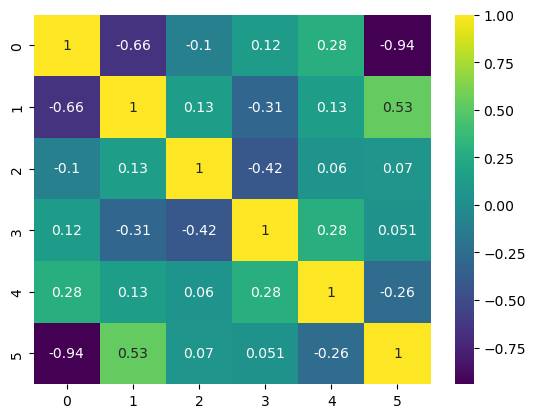

In [139]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

In [130]:
# covarience matrix for a scalled data
covariance_matrix = df_for_scalled.cov()
covariance_matrix

,0,1,2,3,4,5
0,1.020408,-0.675444,-0.103616,0.126078,0.289419,-0.962075
1,-0.675444,1.020408,0.137513,-0.312823,0.134203,0.543571
2,-0.103616,0.137513,1.020408,-0.425631,0.061050,0.071657
3,0.126078,-0.312823,-0.425631,1.020408,0.290399,0.051657
4,0.289419,0.134203,0.061050,0.290399,1.020408,-0.270376
5,-0.962075,0.543571,0.071657,0.051657,-0.270376,1.020408


<Axes: >

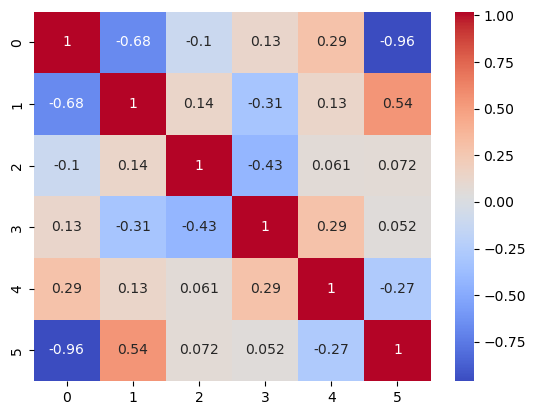

In [133]:
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')

In [146]:
# Using PCA
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(X_full_scaled)


**Variance of features generated by the PCA is given as :**

In [164]:
print("Variance of each features:", pca.explained_variance_)

Variance of each features: [2.61650067 1.43781535 1.17356773 0.68595299 0.17366458 0.03494766]


array([2.61650067, 1.43781535, 1.17356773, 0.68595299, 0.17366458,
       0.03494766])

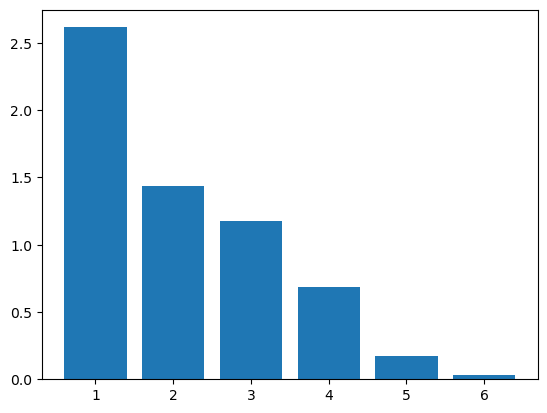

In [165]:
from matplotlib import pyplot as plt

plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
pca.explained_variance_

**Question 6.**	In your opinion, what is the “best” number of Principal Components to use? (again, answer using a markdown cell).

**Answer:** The first four componest contribute the most variance in the dataset. So n = 4 would be better for to build a model.